In [1]:
# Mengimpor library
import numpy as np # library untuk pemrosesan data numerik, terutama dalam manipulasi array dan operasi matematika.
import matplotlib.pyplot as plt # library untuk membuat visualisasi data, seperti grafik dan plot
import pandas as pd # library untuk manipulasi dan analisis data tabular, seperti data dalam format spreadsheet

# Library untuk data preprocessing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Library untuk data modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mengimpor dataset
df = pd.read_csv('assets/insurance.csv') # membaca dataset dari file 'insurance.csv'. 
df.head() #menampilkan lima baris pertama dari dataframe data dengan menggunakan method head().
 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Proses Encoding

In [2]:
le = LabelEncoder() # membuat objek dari LabelEncoder
df['sex'] = le.fit_transform(df['sex']) # proses encoding
df['region'] = le.fit_transform(df['region']) # proses encoding
df['smoker'] = le.fit_transform(df['smoker']) # proses encoding

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Visualisasi Data

c:\Users\Gabriel Dimas\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


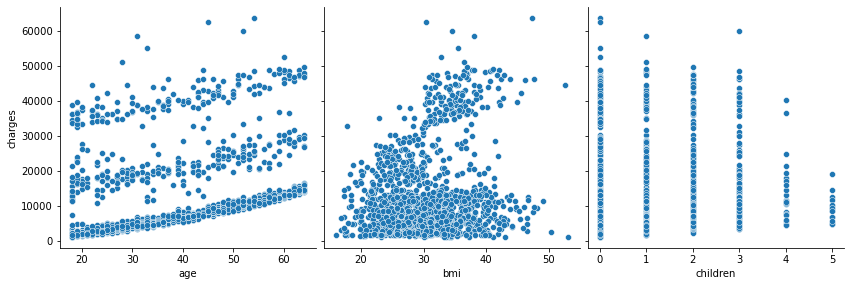

In [3]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', size=4, aspect=1, kind='scatter')

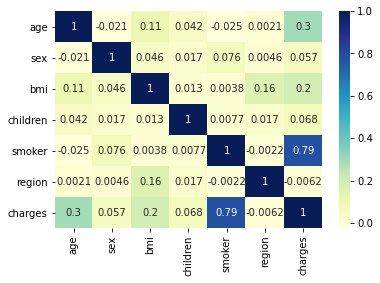

In [4]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [5]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker','region']]
y = df['charges']

Data Preprocessing

In [6]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Modelling

In [7]:
# membuat sebuah objek dari kelas LinearRegression()
linear_model = LinearRegression()

#menggunakan objek linear_model yang telah dibuat sebelumnya untuk melatih model regresi linear
linear_model.fit(x_train, y_train)

LinearRegression()

In [8]:
# melakukan prediksi pada data uji
import statsmodels.api as sm # library  untuk analisis statistik dan model statistik

# Menambahkan konstanta untuk memperhitungkan nilai tetap (intercept) dalam regresi
x_train_sm = sm.add_constant(x_train)

# membuat model regresi linear dengan menggunakan metode OLS
lr = sm.OLS(y_train, x_train_sm).fit()

# membuat prediksi atas hasil variabel target (dalam kasus ini, y_train) berdasarkan data input atau variabel prediktor (x_test)
y_pred = linear_model.predict(x_test)

In [9]:
# menghitung R-squared (R2)
r2 = r2_score(y_test, y_pred)

# menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# menampilkan hasil evaluasi
print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R-squared (R2): 0.7998747145449958
Mean Squared Error (MSE): 31845929.134159442
Mean Absolute Error (MAE): 3930.333273901142


Visualization

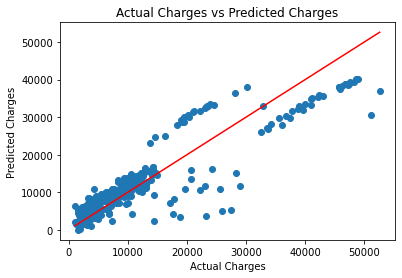

In [10]:
# membuat scatter plot yang menampilkan hubungan antara nilai aktual dari variabel target (y_test) dan nilai yang diprediksi oleh model (y_pred).
plt.scatter(y_test, y_pred)

# membuat garis merah yang menggambarkan garis diagonal (garis identitas) dalam plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')

# memberi label sumbu-x dan sumbu-y pada plot
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

# memberi judul plot
plt.title('Actual Charges vs Predicted Charges')
plt.show()